**Az első 5 feladat ismétlés (többtáblás lekérdezések) a tanulmányi adatbázisból**

1. Készítsünk listát arról, hogy melyik óra melyik teremben van!
    
    1. Jelenítsük meg az óra azonosítóját és a terem nevét!
    2. A listát szűrjük a 3 karakter hosszú, \[100;199\] zárt intervallumba eső termekre! Feltesszük, hogy a 3 karakter hosszú terem nevek csak számjegyeket tartalmaznak.

In [ ]:
SELECT o.ora_id,
        t.terem 
FROM Orak o JOIN Termek t ON o.terem = t.tkód
WHERE LEN(t.terem) = 3 AND t.terem BETWEEN 100 and 199

2. <span style="font-weight: 600; color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px;">Hány óra van összesen az egyes napokon?</span>

1. Jelenítsük meg a napok nevét és az órák számát az adott napon!
2. Az oszlopokat nevezzük el értelemszerűen!
3. A listát rendezzük óraszám szerint növekvő sorrendbe!

In [ ]:
SELECT n.nap AS Napok,
        COUNT(o.ora_id) AS Óraszám
FROM Orak o JOIN Napok n ON o.nap = n.nap_id
GROUP BY n.nap
ORDER BY COUNT(o.ora_id)

3. <span style="font-weight: 600; color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px;">Készítsünk listát arról, hogy melyik oktatónak hány órája van az Órák táblában!</span>

1. A lista jelenítse meg az oktatók nevét, és az órák számát!
2. Az oszlopokat nevezzük el értelemszerűen!
3. A listából hagyjuk ki az óraadókat!

In [ ]:
SELECT ok.nev as 'Tanár neve',
        COUNT(o.ora_id) as 'Órák száma'
FROM Orak o JOIN Oktatok ok ON o.tanar = ok.oktato_id
            JOIN Beosztasok b ON ok.beosztás = b.beosztas_id
WHERE b.beosztas_id NOT LIKE 'óraadó'
GROUP BY ok.nev

4. <span style="color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px;">Van-e olyan tantárgy, amelyből nincs óra?</span>

1. Jelentsük meg a tantárgy nevét és a tantárgyfelelős nevét!

In [47]:
SELECT t.Tantárgynév,
        okt.nev
FROM Tantárgyak t LEFT JOIN Orak o ON o.targy = t.Tkód
                        JOIN Oktatok okt ON t.Tantárgyfelelős = okt.oktato_id
WHERE o.targy IS NULL

(1 row affected)

Total execution time: 00:00:00.009

Tantárgynév,nev
Folyami gáttan,Varga Kata


5. <span style="background-color: rgb(255, 255, 255); color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px;">Hány óra van összesen a 120-as teremben?</span>

**A 6-10 feladatokat halmazműveletek segítségével oldjuk meg, szintén a tanulmányi adatbázison**

6. <span style="background-color:rgb(255, 255, 255);color:rgb(36, 41, 47);font-family:-apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;;font-size:16px;font-weight:600;">Jelenítsük meg azon tanárok azonosítóját és nevét, akik hétfői vagy keddi napokon tanítanak!</span>

In [48]:
-- A lekérdezés: Melyek kezdődnek 8-kor
SELECT t.Tantárgynév
FROM Orak o JOIN Tantárgyak t ON o.targy = t.Tkód
            JOIN Savok s ON o.Sav = s.Sav_id
WHERE s.Időpont = '8.00'

EXCEPT

-- B lekérdezés: Melyek kezdődnek 12:30-kor
SELECT t.Tantárgynév
FROM Orak o JOIN Tantárgyak t ON o.targy = t.Tkód
            JOIN Savok s ON o.Sav = s.Sav_id
WHERE s.Időpont = '12.30'

(3 rows affected)

Total execution time: 00:00:00.017

Tantárgynév
Az ürgeöntés hydrológiai alapjai II.
Fejezetek az ürgék jogaiból
Ürgevitel


7. <span style="background-color: rgb(255, 255, 255); color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px; font-weight: 600;">Melyek azok a tantárgyak, amelyek esetén van óra a 8.00-kor kezdődő sávban, de nincs a 12.30-kor kezdődő sávban?</span>

8. <span style="background-color: rgb(255, 255, 255); color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px; font-weight: 600;">Listázzuk azokat a termeket, amelyekben oktat Kovács László és van olyan tanóra a teremben, ahol a tantárgy nevében nem szerepel az 'ürge' szó!</span>

9. <span style="font-weight: 600; color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px;">Készítsünk listát arról, hogy melyik tanárnak hány órája van a (munka) hét elején (hétfőn), hét közben (kedd, szerda és csütörtök), illetve a hét végén (péntek)!</span>

1. Jelenítsük meg a tanár azonosítóját, nevét, az időszakot (hét eleje - hét közben - hét vége), valamint az óraszámot!
2. A három megjelölt időszakot külön kérdezzük le, majd fűzzük össze a lekérdezések eredményeit!
3. Rendezzük a listát az oktató neve, azon belül időszak szerint!

10. <span style="background-color: rgb(255, 255, 255); color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px; font-weight: 600;">Melyik napokon nincs órája Pelikán Józsefnek?</span>

In [49]:
-- A lek.: összes nap
-- B lek.: mely napokon van órája
-- A-B: mkor nincs órája
SELECT nap
FROM Napok

EXCEPT

SELECT n.nap
FROM Orak o JOIN Oktatok okt ON o.tanar = okt.oktato_id
            JOIN Napok n ON o.nap = n.nap_id
WHERE okt.nev = 'Pelikán József'


(3 rows affected)

Total execution time: 00:00:00.019

nap
Csütörtök
Péntek
Szerda


**A 11-15 feladatok gyakorlásra szolgálnak a közelgő zh-ra :-)**

11. _Készítsünk listát az oktatók adatairól!_

1. Az oktatók titulusa és neve összefűzve jelenjen meg, közöttük szóközzel!
2. Ha valakinek nincs titulusa, akkor csak a neve jelenjen meg, szóköz nélkül!
3. A listát rendezzük a beosztás kódja, azon belül a státusz kódja szerint növekvő sorrendbe!
4. Az oszlopokat nevezzük el értelemszerűen!

<span style="color: #09885a;">12</span>. Készítsünk listát, amely megmutatja, hogy összesen hány tantárgy van kreditenkénti csoportosításban!

  

A listából hagyjuk ki azokat a tételeket, ahol ez a darabszám <span style="color: #09885a;">1</span>!

A Folyami gáttan tantárgyat ne vegyük figyelembe!

A listát rendezzük darabszám szerint csökkenő sorrendbe!

Az oszlopokat nevezzük el értelemszerűen!

13. _Készítsünk listát az oktatók nevéről, a beosztásuk alapján elvárt és a tényleges óraszámukról!_

1. Az oszlopok neve legyen 'Oktató neve', 'Elvárt óraszám' és 'Tényleges óraszám'
2. Szűrjük a listát azokra az oktatókra, ahol az elvárt és a tényleges óraszám azonos

14. _Készítsünk listát, amely megmutatja, hogy mely tantárgyból nincs óra egyáltalán!_

1. Csak a tantárgy neve jelenjen meg!

15. _Hány órájuk van az óraadóknak napi bontásban?_

1. Csak a napok nevét és az óraszámot jelenítsük meg!
2. Rendezzük a listát óraszám szerint növekvő sorrendbe!

> 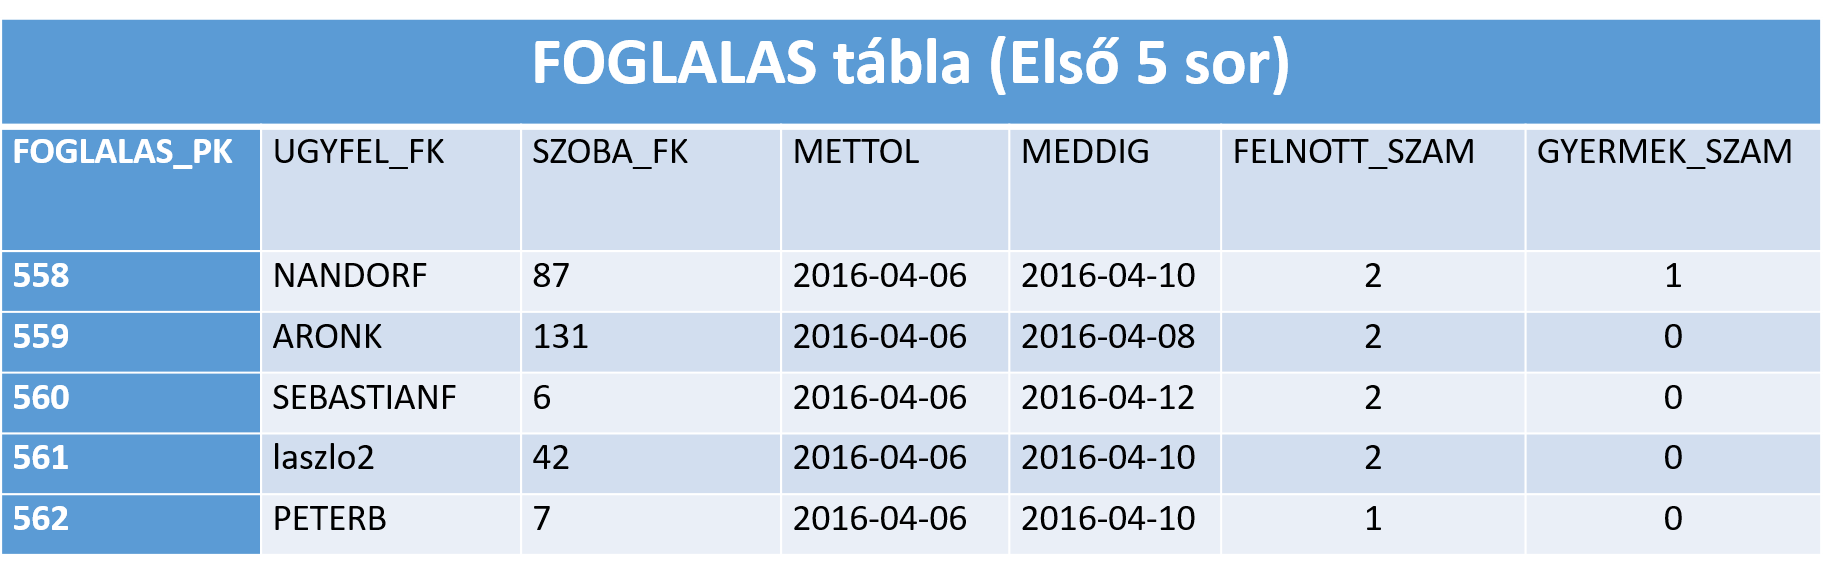Listázzuk "laszlo2" vendég gyermek nélküli foglalásainak adatait!
> 
> a. Egy új oszlopban jelenítsük meg, hogy a foglalás a nyári szezonban (június, július, augusztus) történt-e (Igen/Nem). 
> 
> b. A foglalás dátumánál a METTOL oszlopot vegyük figyelembe

In [15]:
SELECT *,
        CASE
            WHEN METTOL BETWEEN '2016-06-01' and '2016-08-31' THEN 'Igen'
            ELSE 'Nem'
        END as 'Nyári szezon'
FROM Foglalas
WHERE UGYFEL_FK LIKE 'laszlo2' and GYERMEK_SZAM = '0'

(1 row affected)

Total execution time: 00:00:00.010

FOGLALAS_PK,UGYFEL_FK,SZOBA_FK,METTOL,MEDDIG,FELNOTT_SZAM,GYERMEK_SZAM,Nyári szezon
561,laszlo2,42,2016-04-06,2016-04-10,2,0,Nem


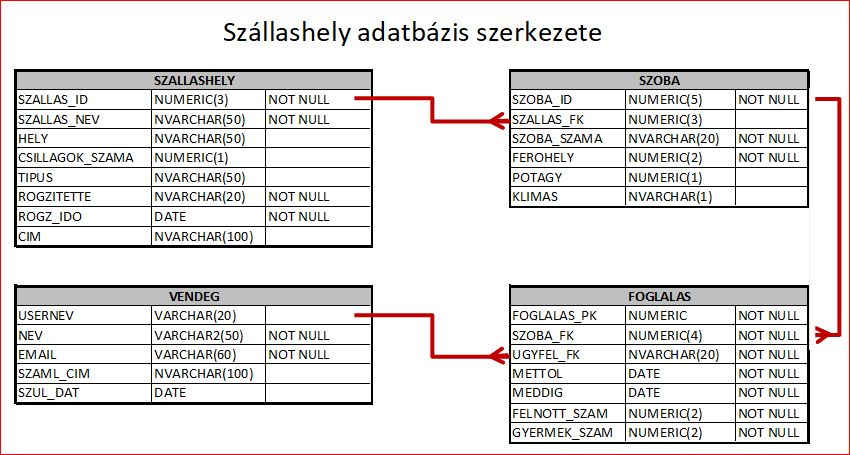

In [24]:
SELECT szh.TIPUS, YEAR(f.METTOL) AS 'Év', MONTH(f.METTOL) AS 'Hónap', COUNT(*)
FROM Foglalas f JOIN Szoba sz ON f.SZOBA_FK = sz.SZOBA_ID
                JOIN Szallashely szh ON sz.SZALLAS_FK = szh.SZALLAS_ID
WHERE DATEDIFF(day, f.METTOL, f.MEDDIG) >=5
GROUP BY szh.TIPUS, YEAR(f.METTOL), MONTH(f.METTOL)

: Msg 8120, Level 16, State 1, Line 1
Column 'Foglalas.METTOL' is invalid in the select list because it is not contained in either an aggregate function or the GROUP BY clause.

Total execution time: 00:00:00.004